In [1]:
library("tidyverse")
eenp = read_csv("https://github.com/rheajaisinghani/BIOS512/raw/main/EENP.csv")

april_df = eenp %>% filter(str_detect(time, "^4|^04")) %>% arrange(time)

# 247 rows total for April
sep_date = april_df %>%
           mutate(date = gsub("4/", "04/", time)) %>%
           mutate(date = gsub("004/", "04/", date)) %>%
           mutate(time = gsub("4/", "04/", time)) %>%
           mutate(time = gsub("004/", "04/", date)) %>%
           mutate(date = str_sub(date, 1, 10)) %>%
           mutate(time = str_sub(time, 12, -1)) %>%
           mutate(time = gsub("AM", "", time))

# 66 rows where time has "PM" 
# 181 rows where time doees not have "PM"
april_am = sep_date %>% 
           filter(endsWith(time, "PM") == FALSE) %>%
           select(date, time, sugar, charlie, note, alert, retest, reaction)
#181 data points use to MERGE

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  time = col_character(),
  sugar = col_double(),
  charlie = col_character(),
  note = col_character(),
  alert = col_character(),
  retest = col_character(),
  reaction = col_character()
)




In [2]:
fix_time = sep_date %>% filter(endsWith(time, "PM") == TRUE)
fix_time = fix_time %>% mutate(pm_hour = substr(time, 1,2))

hour_colon = fix_time %>% filter(endsWith(pm_hour, ":") == TRUE) %>% mutate(pm_hour = substr(pm_hour, 1, 1))
    fix_hour_colon = hour_colon %>% 
                     mutate(pm_hour = as.integer(pm_hour) + 12) %>% 
                     mutate(pm_hour = as.character(pm_hour)) %>%
                     mutate(time = str_replace(time, substr(time, 1, 1), pm_hour)) %>%
                     mutate(time = str_sub(time, 1, -4)) %>%
                     select(date, time, sugar, charlie, note, alert, retest, reaction)
    fix_hour_colon # 47 points to merge

hour_nocolon = fix_time %>% filter(endsWith(pm_hour, ":") == FALSE) 
hour_12 = hour_nocolon %>% 
          filter(pm_hour == "12") %>%
          mutate(time = str_sub(time, 1, -4)) %>%
          select(date, time, sugar, charlie, note, alert, retest, reaction)
hour_12 # 9 points to merge

hour_no12 = hour_nocolon %>% 
            filter(pm_hour != "12") %>%
            mutate(pm_hour = as.integer(pm_hour) + 12) %>%
            mutate(pm_hour = as.character(pm_hour)) 

hour_2223 = hour_no12 %>%
            mutate(time = str_replace(time, substr(time, 1, 2), pm_hour)) %>%
            mutate(time = str_sub(time, 1, -4)) %>%
            select(date, time, sugar, charlie, note, alert, retest, reaction)
hour_2223 # 10 data points to merge


date,time,sugar,charlie,note,alert,retest,reaction
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
04/13/2020,13:20:53,183,Nose Bump,NA,Alert,30 minute retest,Bolus
04/13/2020,18:34:46,92,No Alert Behavior,NA,None,NA,Nothing
04/13/2020,19:07:32,128,Nose Bump,Just ate,Alert,NA,Nothing
04/15/2020,17:04:21,206,Nose Bump,NA,Alert,NA,Eat/Drink
04/15/2020,18:12:53,130,Nose Bump,NA,Alert,NA,Nothing
04/15/2020,18:47:39,106,No Alert Behavior,NA,None,30 minute retest,Nothing
04/16/2020,14:03:05,236,Nose Bump,Just ate,Alert,NA,Nothing
04/16/2020,18:37:44,64,No Alert Behavior,NA,None,NA,Eat/Drink
04/16/2020,19:50:39,147,No Alert Behavior,NA,Alert,NA,Nothing


date,time,sugar,charlie,note,alert,retest,reaction
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
04/13/2020,12:18:39,114,No Alert Behavior,NA,Alert,NA,Nothing
04/17/2020,12:14:24,116,No Alert Behavior,NA,None,NA,Nothing
04/18/2020,12:00:30,263,Nose Bump,NA,Alert,NA,Bolus
04/22/2020,12:17:17,115,Panting,NA,Alert,NA,Nothing
04/22/2020,12:48:59,104,No Alert Behavior,NA,None,30 minute retest,Nothing
04/26/2020,12:51,175,Nose Bump,NA,Alert,NA,Nothing
04/28/2020,12:07:38,73,Nose Bump,NA,Alert,NA,Eat/Drink
04/29/2020,12:26:56,175,No Alert Behavior,NA,Alert,30 minute retest,Nothing
04/30/2020,12:34:12,187,No Alert Behavior,NA,None,30 minute retest,Bolus


date,time,sugar,charlie,note,alert,retest,reaction
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
04/104/202,18:57:02,233,Nose Bump,NA,Alert,NA,Bolus
04/15/2020,22:25:04,196,No Alert Behavior,NA,None,NA,Bolus
04/17/2020,22:21:12,358,No Alert Behavior,NA,None,NA,Bolus
04/23/2020,22:28:48,168,No Alert Behavior,NA,None,NA,Nothing
04/204/202,17:26:13,175,Nose Bump,NA,Alert,NA,Nothing
04/204/202,18:02:31,172,Nose Bump,NA,Alert,30 minute retest,Nothing
04/204/202,18:33:38,182,No Alert Behavior,NA,Alert,60 minute retest,NA
04/27/2020,22:24:27,228,No Alert Behavior,NA,Alert,NA,Bolus
04/29/2020,22:40:28,285,Nose Bump,NA,Alert,NA,Bolus


In [3]:
april = rbind(april_am, fix_hour_colon, hour_12, hour_2223) %>%
        arrange(date, time) 
april %>% head

date,time,sugar,charlie,note,alert,retest,reaction
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
04/01/2020,10:56,234,Nose Bump,NA,Alert,NA,Bolus
04/01/2020,12:28,189,No Alert Behavior,NA,None,NA,Bolus
04/01/2020,14:21,141,Scratching,NA,Alert,NA,Nothing
04/01/2020,14:53,179,No Alert Behavior,NA,None,30 minute retest,Nothing
04/01/2020,19:10,125,No Alert Behavior,NA,None,NA,Nothing
04/01/2020,19:38,122,Nose Bump,NA,Alert,NA,Nothing


Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”


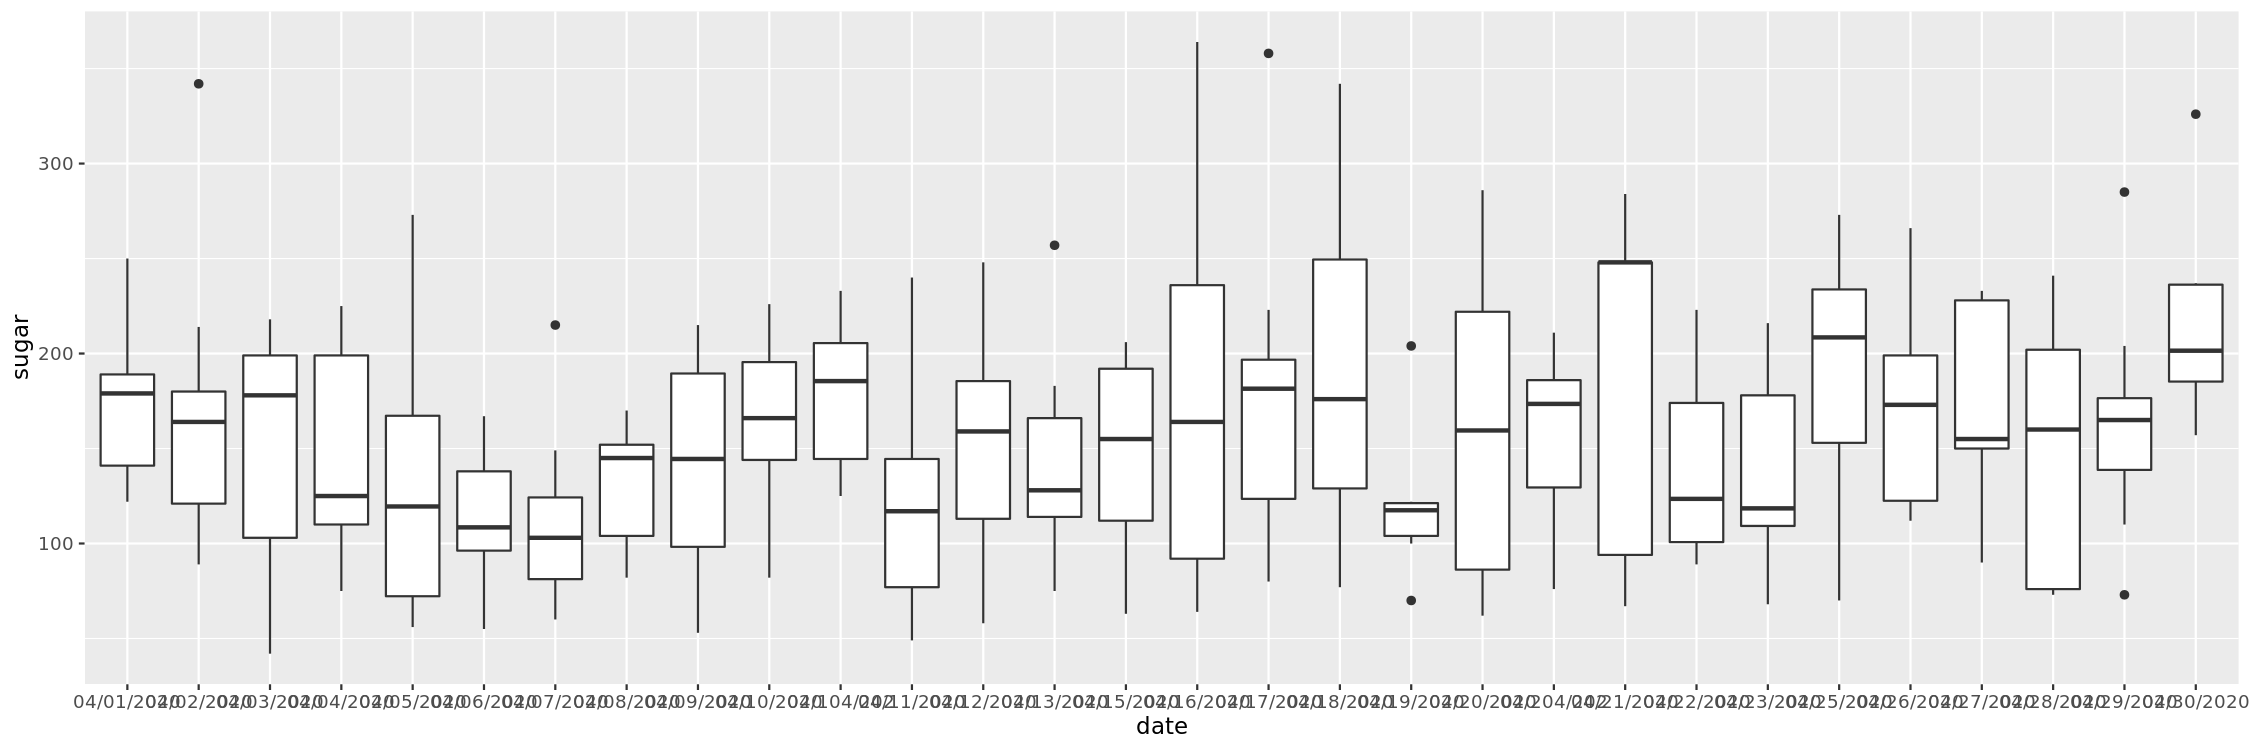

In [12]:
options(repr.plot.res = 150, repr.plot.height = 5, repr.plot.width = 15)

p = ggplot(april, aes(x = date, y = sugar)) + 
    geom_boxplot()
p